# Amazon Mobile Phone Reviews-Sentiment Analysis-EDA

In [1]:
# Dataframe
import pandas as pd

# Array
import numpy as np

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime
# text preprocessing
import spacy
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
tokenizer = ToktokTokenizer()
nlp = spacy.load('en', parse=True, tag=True, entity=True)
from sklearn.feature_extraction.text import CountVectorizer

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bhanu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Reading the Cleaned Dataset

In [38]:
df = pd.read_json('clean_review.json')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43693 entries, 0 to 43692
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   body          43693 non-null  object
 1   product_id    43693 non-null  object
 2   rating        43693 non-null  int64 
 3   review_date   43693 non-null  int64 
 4   title         43693 non-null  object
 5   rating_class  43693 non-null  object
 6   review_text   43693 non-null  object
 7   clean_text    43693 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.0+ MB


### Inspecting the Dataset

In [39]:
df.head(5)

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text
0,hanging this phone always,Samsung Galaxy M31s,1,1602892800000,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,1602892800000,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,1602892800000,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...
3,like,Samsung Galaxy M31s,5,1602892800000,Good,good,Good like,good like
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,1602892800000,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...


In [5]:
df.shape

(43693, 8)

In [6]:
import pandas_profiling

In [7]:
pandas_profiling.ProfileReport(df)

## Exploratory Data Analysis

### 1.  "Product" Feature

Text(0, 0.5, 'Number of Reviews')

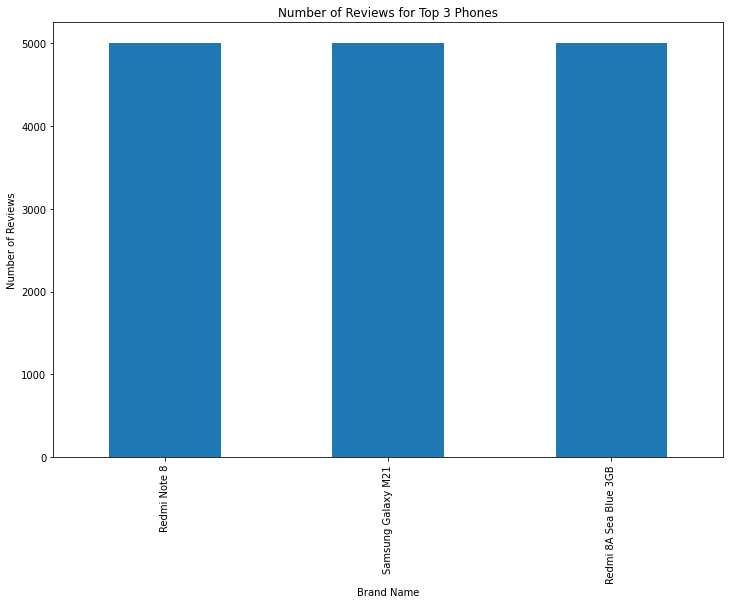

In [11]:
# PLOT NUMBER OF REVIEWS FOR TOP 3 PHONES  

brands = df["product_id"].value_counts()
plt.figure(figsize=(12,8))
brands[:3].plot(kind='bar')
plt.title("Number of Reviews for Top 3 Phones")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

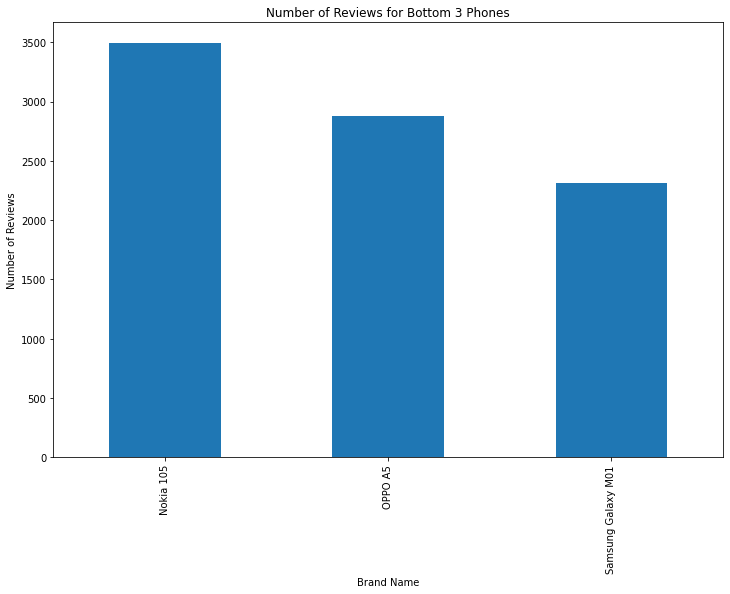

In [12]:
# PLOT NUMBER OF REVIEWS FOR BOTTOM 3 PHONES

brands = df["product_id"].value_counts()
plt.figure(figsize=(12,8))
brands[-3:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 3 Phones")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

In [14]:
apple_fplot = df.groupby(['review_date'])['rating'].mean()
apple_fplot

review_date
1568937600000    5.000000
1569024000000    4.750000
1569110400000    5.000000
1569196800000    5.000000
1569283200000    5.000000
                   ...   
1602633600000    4.518412
1602720000000    4.138043
1602806400000    3.962335
1602892800000    4.090909
1602979200000    5.000000
Name: rating, Length: 373, dtype: float64

In [15]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords = []
for m in df['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords.append(n)
print(ListWords[10])


['phone', 'galaxy', 'month', 'old', 'need', 'exchange', 'phone', 'phone', 'samsung', 'galaxy', 'month', 'exchange', 'phone', 'samsung', 'phone', 'phone', 'new', 'charger', 'earphone']


In [16]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords):
    all_words = []
    for m in ListWords:
        for w in m:
            all_words.append(w.lower())
    all_words1 = FreqDist(all_words)
    return all_words1


Combien de Mots !!! 22284


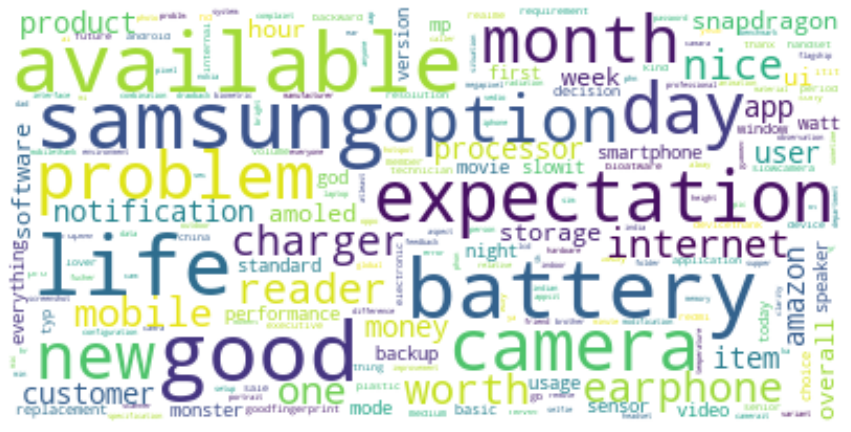

In [17]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words4 = Bag_Of_Words(ListWords)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words4.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words4))


<AxesSubplot:>

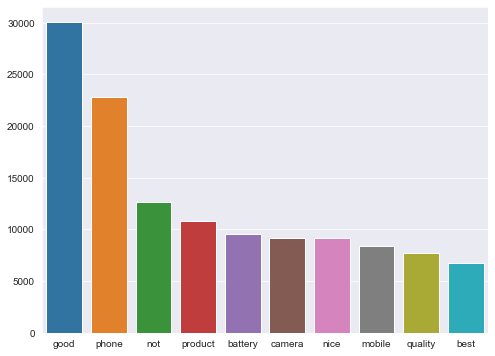

In [18]:
plt.figure(figsize = (8,6))
import seaborn as sns
from sklearn.manifold import TSNE
all_words4 = Bag_Of_Words(ListWords)
count = []
Words  = []
for w in all_words4.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

In [21]:
j_1 = df[(df['product_id']=="Samsung Galaxy M31s") & (df['rating']<3)]
j_1

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text
0,hanging this phone always,Samsung Galaxy M31s,1,1602892800000,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always
7,Hanging issue. Now want to replace but option ...,Samsung Galaxy M31s,2,1602806400000,Hanging problem,bad,Hanging problem Hanging issue. Now want to rep...,hang problem hang issue want replace option no...
12,Phone strakScreen shot not optionCharge lowN...,Samsung Galaxy M31s,1,1602806400000,Don't purchase,bad,Don't purchase Phone strakScreen shot not o...,dont purchase phone strakscreen shoot not opti...
13,The phone is faultyIt's hang everyday. When re...,Samsung Galaxy M31s,1,1602806400000,Faulti phone,bad,Faulti phone The phone is faultyIt's hang ever...,faulti phone phone faultyits hang everyday res...
17,Worst camera seen ever. Even VGA camera is bet...,Samsung Galaxy M31s,1,1602806400000,Worst phone,bad,Worst phone Worst camera seen ever. Even VGA c...,worst phone worst camera see ever even vga cam...
...,...,...,...,...,...,...,...,...
4939,network is too slow.. bad experience,Samsung Galaxy M31s,1,1600646400000,Network issue... data is too slow,bad,Network issue... data is too slow network is t...,network issue data slow network slow bad exper...
4973,The fingerprint is good at the newly phone but...,Samsung Galaxy M31s,2,1600646400000,Not to buy,bad,Not to buy The fingerprint is good at the newl...,not buy fingerprint good newly phone day day u...
4980,Hi friends iam writing this review after use o...,Samsung Galaxy M31s,1,1600646400000,useless phone,bad,useless phone Hi friends iam writing this revi...,useless phone hi friends iam write review use ...
4984,Not satisfied,Samsung Galaxy M31s,1,1600646400000,Not satisfied,bad,Not satisfied Not satisfied,not satisfy not satisfy


In [24]:
print(j_1['review_text'][4984])

Not satisfied Not satisfied


In [25]:
from nltk.tokenize import RegexpTokenizer
def RegExpTokenizer(Sent):
    tokenizer = RegexpTokenizer(r'\w+')
    return tokenizer.tokenize(Sent)

ListWords1 = []
for m in j_1['clean_text']:
    n = RegExpTokenizer(str(m))
    ListWords1.append(n)
print(ListWords1[1])


['hang', 'problem', 'hang', 'issue', 'want', 'replace', 'option', 'not', 'show', 'exchange', 'replacehanging', 'problem']


In [26]:
#All Words
from nltk import FreqDist
def Bag_Of_Words(ListWords1):
    all_words1 = []
    for m in ListWords1:
        for w in m:
            all_words1.append(w.lower())
    all_words2 = FreqDist(all_words1)
    return all_words2


Combien de Mots !!! 2270


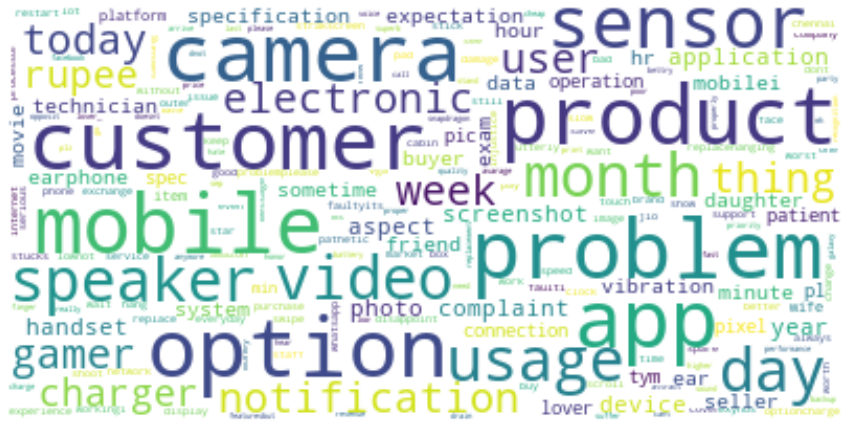

In [27]:
import matplotlib as mpl
from wordcloud import WordCloud
all_words5 = Bag_Of_Words(ListWords1)
ax = plt.figure(figsize=(15,10))
# Generate a word cloud image
wordcloud = WordCloud(background_color='white',max_font_size=40).generate(' '.join(all_words5.keys()))

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
print("Combien de Mots !!!",len(all_words5))


<AxesSubplot:>

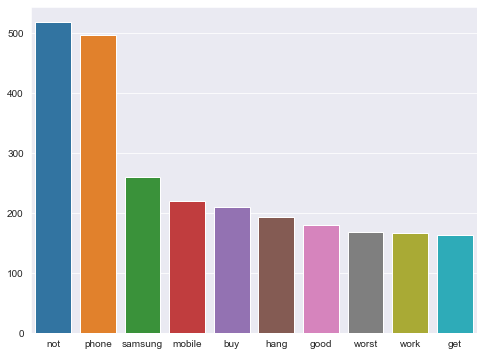

In [28]:
plt.figure(figsize = (8,6))

import seaborn as sns
from sklearn.manifold import TSNE
all_words5 = Bag_Of_Words(ListWords1)
count = []
Words  = []
for w in all_words5.most_common(10):
    count.append(w[1])
    Words.append(w[0])
sns.set_style("darkgrid")
sns.barplot(Words,count)

### 1.  "rating_class" and "Review Length" Features

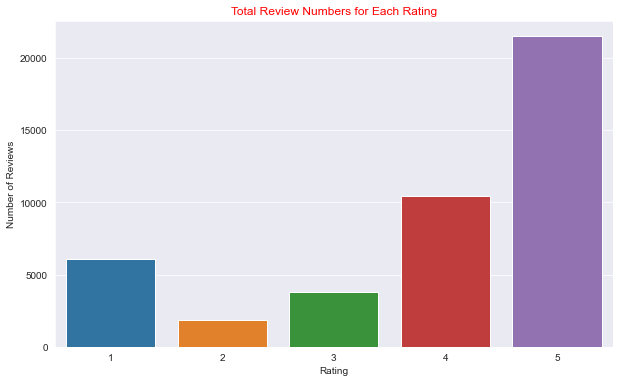

5    21518
4    10460
1     6084
3     3789
2     1842
Name: rating, dtype: int64

In [29]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(df['rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating'].value_counts()

<AxesSubplot:ylabel='rating'>

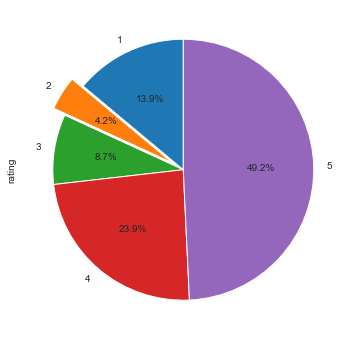

In [30]:
%matplotlib inline
plt.figure(figsize = (10,6))

df.groupby('rating').rating.count()
df.groupby('rating').rating.count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [31]:
word_count=[]
for s1 in df.review_text:
    word_count.append(len(str(s1).split()))


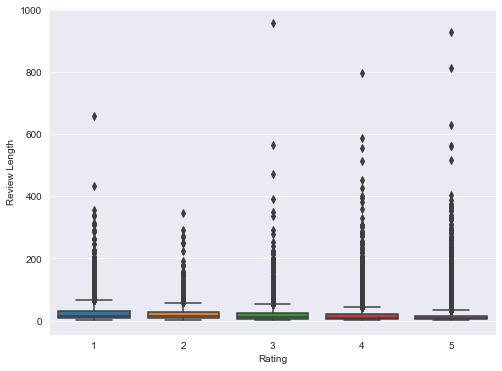

In [32]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()


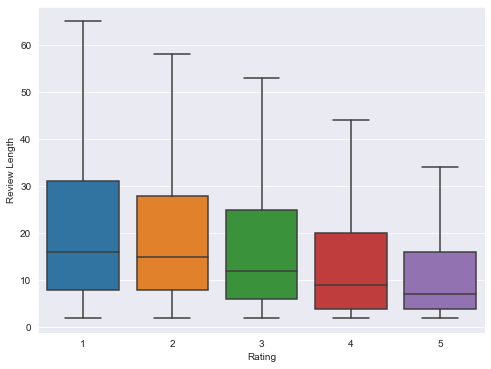

In [33]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

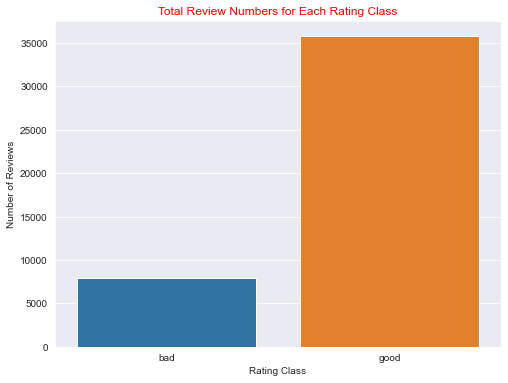

good    35767
bad      7926
Name: rating_class, dtype: int64

In [34]:
# Total numbers of ratings in rating_class
plt.figure(figsize = (8,6))
sns.countplot(df['rating_class'])
plt.title('Total Review Numbers for Each Rating Class', color='r')
plt.xlabel('Rating Class')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['rating_class'].value_counts()

MOst of the customers who bought mobile phones from amazon gave good rating on the product 

### 2. Features

In [48]:
df1 = pd.read_csv ('clean_review.csv')

In [49]:
df['review_date'] = df1['review_date']
df.head(5)

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like,good like
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...


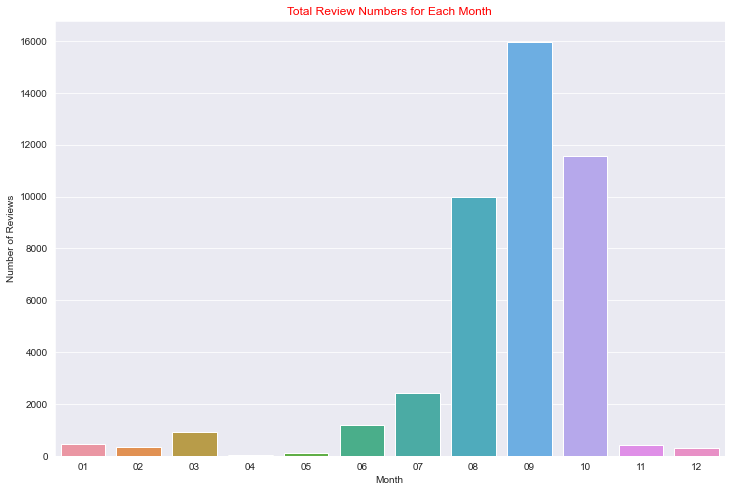

2020-10-14    2091
2020-09-29    1228
2020-09-30    1040
2020-10-15     920
2020-10-03     899
              ... 
2020-04-09       1
2020-04-01       1
2020-10-18       1
2020-04-17       1
2020-04-19       1
Name: review_date, Length: 373, dtype: int64

In [56]:
# Total review for every month
plt.figure(figsize = (12,8))
tmp = df['review_date'].str.replace('2020-', "")
tmp2 = tmp.str.replace('2019-', "")
tmp3 = tmp2.str.replace('-[0-9][0-9]', "")
sns.countplot(tmp3)
plt.title('Total Review Numbers for Each Month', color='r')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['review_date'].value_counts()

Text(0, 0.5, 'Number of Reviews')

<Figure size 1080x576 with 0 Axes>

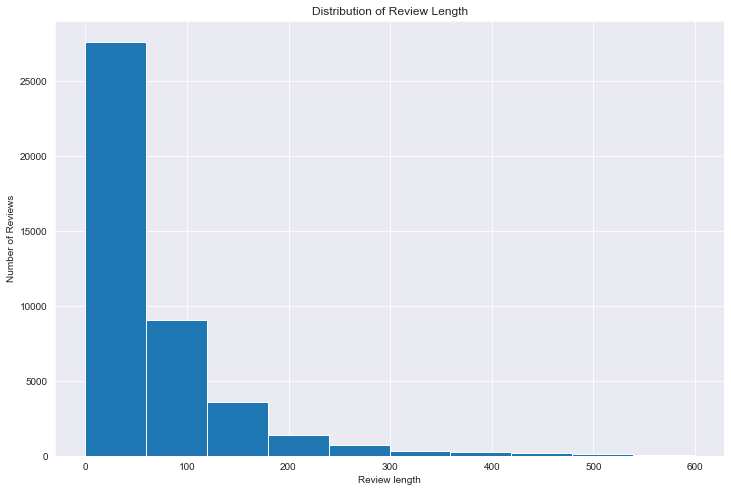

In [68]:
# PLOT DISTRIBUTION OF REVIEW LENGTH   
plt.figure(figsize = (15,8))

review_length = df["clean_text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
review_length.loc[review_length < 600].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length')
plt.ylabel('Number of Reviews')

<Figure size 864x576 with 0 Axes>

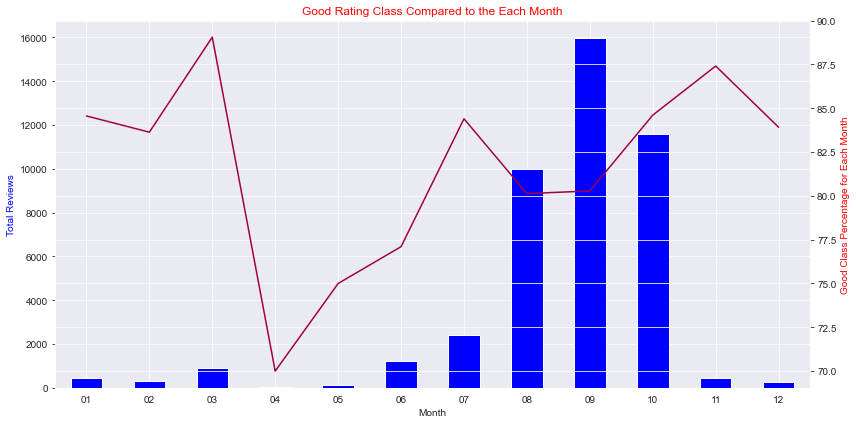

In [74]:
# Create a graph for each rating class to compare within the months

df['rating_class_num'] = df['rating_class'].map({'good': 1, 'bad': 0})
df['month'] = tmp3
feature = df.groupby('month').agg({'rating_class_num':['size', 'sum', 'mean']})
feature.columns = [' '.join(col).strip() for col in feature.columns.values]
feature = feature.reset_index()
feature['rating_class_num mean'] = feature['rating_class_num mean']*100
feature.columns = ['Month', 'Total Reviews', 'Relevant Rating Number', 
                    '% of Relevant Rating Number in This Month'] 
plt.figure(figsize = (12,8))
fig0, ax1 = plt.subplots(figsize = (12,6))
ax2 = ax1.twinx()
feature.set_index(feature['Month'], drop=True, inplace=True)
feature["Total Reviews"].plot(kind = 'bar', stacked = True, ax = ax1, colormap = 'winter', rot=0)
feature['% of Relevant Rating Number in This Month'].plot(use_index = False, 
                                                         kind = 'line', ax = ax2, colormap='Spectral')   

plt.title('Good Rating Class Compared to the Each Month', color='r')
ax1.set_xlabel('Month')
ax1.yaxis.label.set_color('blue')
ax1.set_ylabel("Total Reviews")
ax2.set_ylabel("Good Class Percentage for Each Month")
ax2.yaxis.label.set_color('red')
plt.tight_layout()
plt.show()

In [75]:
# Function for creating a column token
def token (text):
    token = [w for w in nltk.word_tokenize(text)]
    return token

# To create token feature
df['token'] = df['clean_text'].apply(token)

In [76]:
# Function for creating a column to see the length of the review text
def length(text):
    length = len([w for w in nltk.word_tokenize(text)])
    return length

# Apply length function to create review length feature
df['review_length'] = df['review_text'].apply(length)
df.head(3)

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text,rating_class_num,month,token,review_length
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always,0,10,"[not, good, phone, dont, buy, hang, phone, alw...",11
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...,1,10,"[not, good, expect, heat, issue, battery, life...",22
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...,1,10,"[samsung, take, care, malfunction, issue, seri...",37


In [77]:
# Create review length bin feature
df['review_length_bin'] = pd.cut(df['review_length'], np.arange(0,4800,100))
df.head()

,body,product_id,rating,review_date,title,rating_class,review_text,clean_text,rating_class_num,month,token,review_length,review_length_bin
0,hanging this phone always,Samsung Galaxy M31s,1,2020-10-17,Not good phone. Don't buy,bad,Not good phone. Don't buy hanging this phone a...,not good phone dont buy hang phone always,0,10,"[not, good, phone, dont, buy, hang, phone, alw...",11,"(0, 100]"
1,Heating issue and battery life decreased in ju...,Samsung Galaxy M31s,3,2020-10-17,not as good as expected,good,not as good as expected Heating issue and batt...,not good expect heat issue battery life decrea...,1,10,"[not, good, expect, heat, issue, battery, life...",22,"(0, 100]"
2,Facing lot of problems. Battery is getting dra...,Samsung Galaxy M31s,3,2020-10-17,Samsung should take care of the above malfunct...,good,Samsung should take care of the above malfunct...,samsung take care malfunction issue seriously ...,1,10,"[samsung, take, care, malfunction, issue, seri...",37,"(0, 100]"
3,like,Samsung Galaxy M31s,5,2020-10-17,Good,good,Good like,good like,1,10,"[good, like]",2,"(0, 100]"
4,Samsung Galaxy M31s phone is HangingCamera qua...,Samsung Galaxy M31s,3,2020-10-17,Don't over expectation,good,Don't over expectation Samsung Galaxy M31s pho...,dont expectation samsung galaxy ms phone hangi...,1,10,"[dont, expectation, samsung, galaxy, ms, phone...",25,"(0, 100]"


In [80]:
# Good rating percentages for each length bin with 50's
per_pos_length = df.groupby(['review_length_bin'])['rating_class_num'].mean()
df['review_length_bin'] = df.review_length_bin.astype(str)
per_pos_length = per_pos_length*100
per_pos_length

review_length_bin
(0, 100]         82.116105
(100, 200]       68.005355
(1000, 1100]    100.000000
(1100, 1200]    100.000000
(200, 300]       78.378378
(300, 400]       73.469388
(400, 500]       92.857143
(500, 600]      100.000000
(600, 700]      100.000000
(700, 800]        0.000000
(900, 1000]     100.000000
Name: rating_class_num, dtype: float64

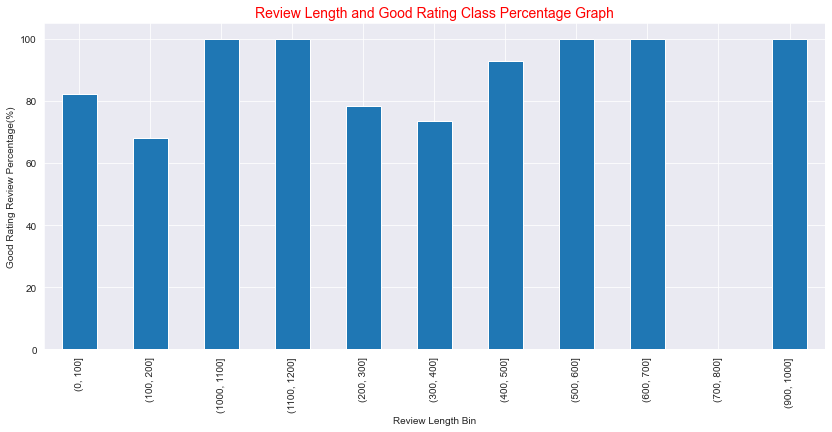

In [81]:
# Plot the graph for good rating class percentage and review length bin
plt.figure(figsize = (14,6))
per_pos_length.plot(kind='bar')
plt.title('Review Length and Good Rating Class Percentage Graph', color = 'r', size = 14)
plt.xlabel('Review Length Bin')
plt.ylabel('Good Rating Review Percentage(%)')
plt.show()

As it might be seen the graph, the highest percentage of good rating reviews lies above 500 words with 100% whereas lowest percentage of good rating reviews lies between 700-800 words with 0%. As the review length extends, the good rating tends to increase.  Generally, the customers who write longer reviews (more than 500 words) tend to give good ratings.

#### Correlation Between Numeric Variables

<AxesSubplot:>

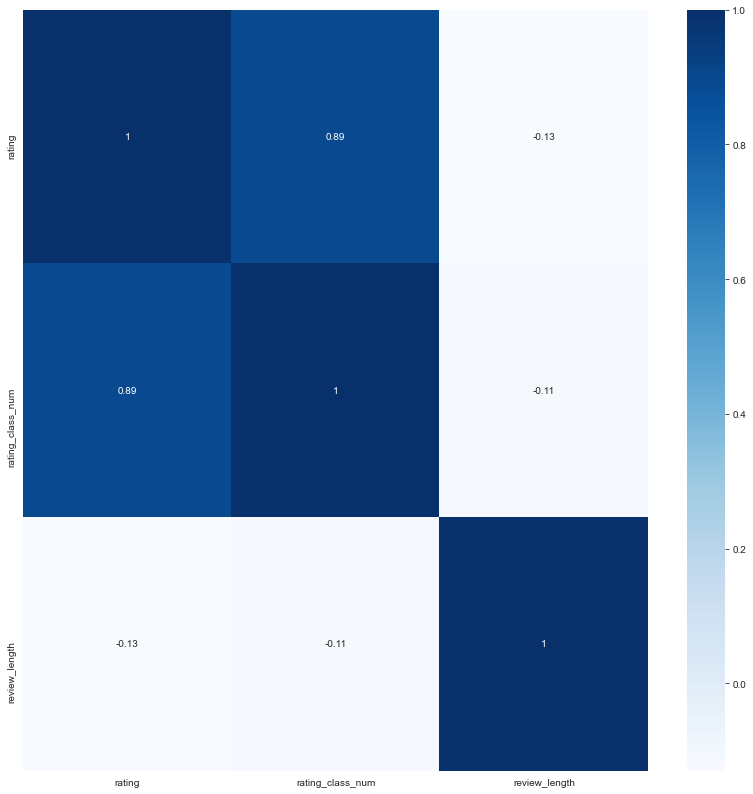

In [83]:
# Plotting correlation matrix between numeric variables

plt.figure(figsize = (14,14))
sns.heatmap(df.corr(method="pearson"), cmap='Blues', annot = True)

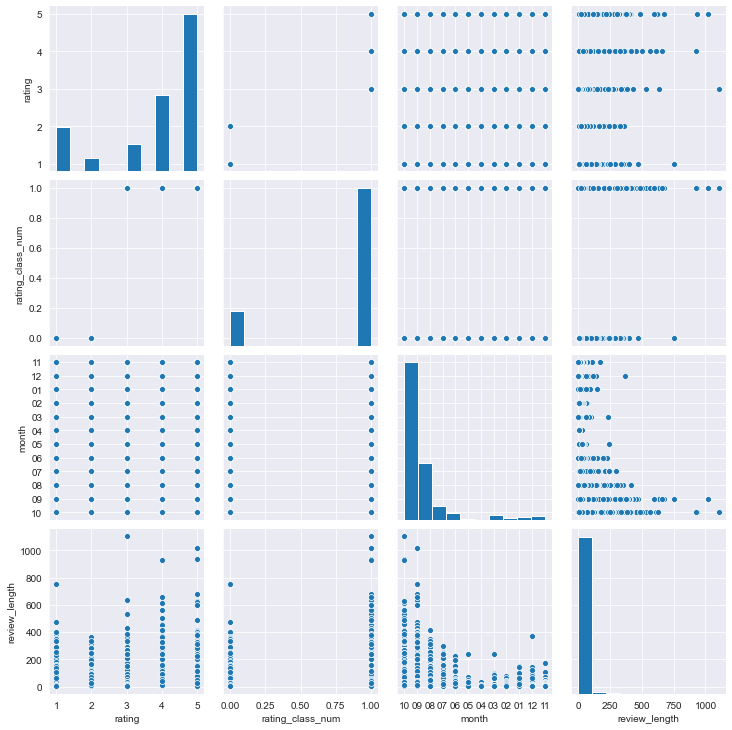

In [84]:
sns.pairplot(df)